# Required Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from plotnine import *

# PCA for Data Visualisation

PCA can be used to reduce the number of dimensions, so that you can see differences in a lower dimension. If the dimension is two or three you can plot the result.

## Data Preparation

We will work with the **iris** dataset. It is shipped with *sklearn*.

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = iris.data

In [4]:
X = pd.DataFrame(iris_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = iris.target

## Modeling

Standardisation of data, followed by direct implementation of PCA. PCA is performed to reduce the number of dimensions from 4 to 2.

Scaling of the data is relevant, because features can be of very different ranges.

In [6]:
pca = PCA(n_components=2)

steps = [
    ('scalar', StandardScaler()),
    ('pca', pca)
]

pipeline = Pipeline(steps)

prin_comp = pipeline.fit_transform(X)

In [7]:
prin_df = pd.DataFrame(data = prin_comp
             , columns = ['PC1', 'PC2'])

In [8]:
y_df = pd.DataFrame(y, columns=['y'])

In [9]:
prin_df = pd.concat([prin_df, y_df], axis = 1)

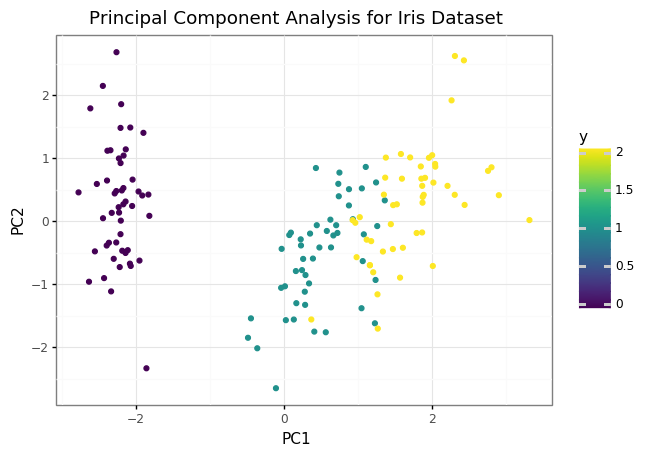

<ggplot: (-9223371888516100892)>

In [12]:
(ggplot(data=prin_df) 
    + aes(x='PC1', y='PC2') 
    + geom_point(aes(color='y'))
    + labs(title ='Principal Component Analysis for Iris Dataset')
    + theme_bw()
)

The classes are now much clearer to separate, although we reduced the dimensions from four to two.

The explained variance can be extracted from the pca object.

In [13]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

# PCA for Speeding up ML

Import the data for Mnist. It is part of *sklearn*.

In [10]:
mnist = datasets.load_digits()

In [11]:
#images_and_labels = list(zip(mnist.images, mnist.target))

In [12]:
n_samples = len(mnist.images)
X = mnist.images.reshape((n_samples, -1))
y = mnist.target

In [13]:
X.shape, y.shape

((1797, 64), (1797,))

Data is splitted into training and testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split( mnist.data, mnist.target, test_size=0.2, random_state=0)

In [15]:
X_train.shape

(1437, 64)

**fit()** calculates mean and standard deviation. We need to ensure that these values are derived only from training data, but that the transformations are applied to training and testing.

In [16]:
scaler = StandardScaler()
pca = PCA(n_components=2)
steps = [
    ('scalar', scaler),
    ('pca', pca)
]

pipeline = Pipeline(steps)

X_train_res = pipeline.fit_transform(X_train)
X_test_res = pipeline.transform(X_test)

Now we will create a graph that shows PC1 and PC2. The colors indicate the classes (digits). We do this for the training and test data.

At first the training data

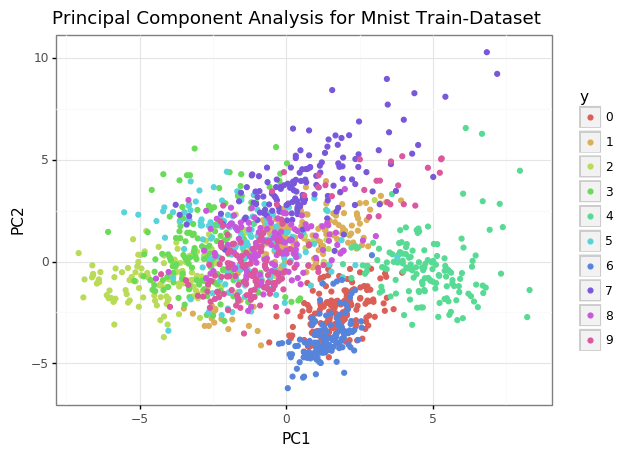

<ggplot: (-9223371878911490360)>

In [17]:
prin_df = pd.DataFrame(data = X_train_res, columns = ['PC1', 'PC2'])
y_df = pd.DataFrame(y_train, columns=['y'])
y_df['y'] = y_df['y'].astype('category')
prin_df = pd.concat([prin_df, y_df], axis = 1)

(ggplot(data=prin_df) 
    + aes(x='PC1', y='PC2') 
    + geom_point(aes(color='y'))
    + labs(title ='Principal Component Analysis for Mnist Train-Dataset')
    + theme_bw()
)

Now the test data.

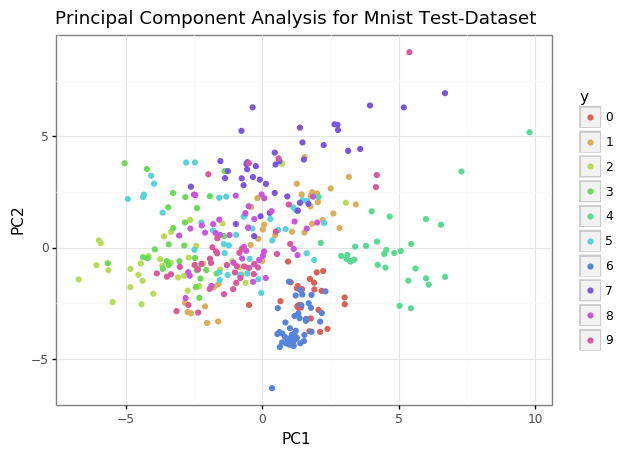

<ggplot: (-9223371878911481712)>

In [18]:
prin_df = pd.DataFrame(data = X_test_res, columns = ['PC1', 'PC2'])
y_df = pd.DataFrame(y_test, columns=['y'])
y_df['y'] = y_df['y'].astype('category')
prin_df = pd.concat([prin_df, y_df], axis = 1)

(ggplot(data=prin_df) 
    + aes(x='PC1', y='PC2') 
    + geom_point(aes(color='y'))
    + labs(title ='Principal Component Analysis for Mnist Test-Dataset')
    + theme_bw()
)